In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [116]:
columns = ["Sepal Length","Sepal width","Petal Length","Petal Width","Names"]
data = pd.read_csv("iris.data", names= columns)
data.head()

,Sepal Length,Sepal width,Petal Length,Petal Width,Names
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
data.shape

(150, 5)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Names         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Statistical Description

In [119]:
data.describe()

,Sepal Length,Sepal width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Finding Null Values

In [120]:
data.isnull().sum()

Sepal Length    0
Sepal width     0
Petal Length    0
Petal Width     0
Names           0
dtype: int64

## Checking Outliers


Sepal Length       Axes(0.125,0.53;0.352273x0.35)
Sepal width     Axes(0.547727,0.53;0.352273x0.35)
Petal Length       Axes(0.125,0.11;0.352273x0.35)
Petal Width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

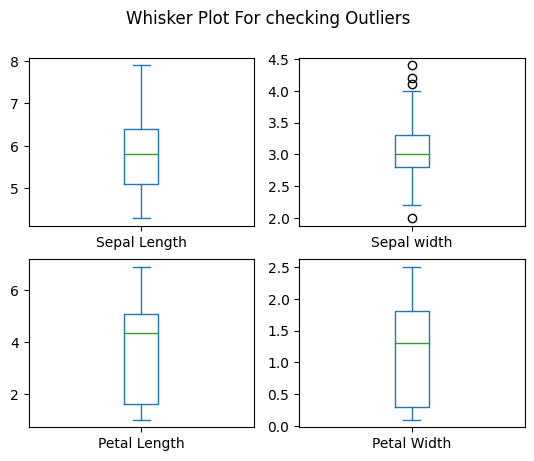

In [121]:
data.plot(kind='box',subplots=True,layout=(2,2),title="Whisker Plot For checking Outliers")

## Inter Quartile Range

In [122]:
Q1 = data['Sepal width'].quantile(0.25)
Q3 = data['Sepal width'].quantile(0.75)
IQR = Q3 - Q1
print("Quartile 1 : ", Q1)
print("Quartile 3 : ", Q3)
print("Inter Quartile Range : ", IQR)


Quartile 1 :  2.8
Quartile 3 :  3.3
Inter Quartile Range :  0.5


## Above Upper Bound 

Formula : Quartile 3 which is upper side, is Added to (1.5 times the Inter Quartile range)

In [123]:
upper = Q3+1.5*IQR
upper_arr = np.where(data['Sepal width']>upper)[0]
print("Upper Bound : ", upper)
# print(upper_arr.sum())

Upper Bound :  4.05


## Below Lower Bound

Formula : Quartile 1 which is Lower side, is Subtracted to (1.5 times the Inter Quartile range)

In [124]:
lower = Q1-1.5*IQR
lower_arr = np.where(data['Sepal width']<lower)[0]
print("Lower Bound : ",lower)
# print(lower_arr.sum())

Lower Bound :  2.05


## Removing Outliers

In [125]:
print("Before Removing Outliers : ", data.shape)
data = data.drop(index=upper_arr)
data = data.drop(index=lower_arr)


Before Removing Outliers :  (150, 5)


In [126]:
print("After Removing Outliers : ", data.shape )

After Removing Outliers :  (146, 5)


Sepal Length       Axes(0.125,0.53;0.352273x0.35)
Sepal width     Axes(0.547727,0.53;0.352273x0.35)
Petal Length       Axes(0.125,0.11;0.352273x0.35)
Petal Width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

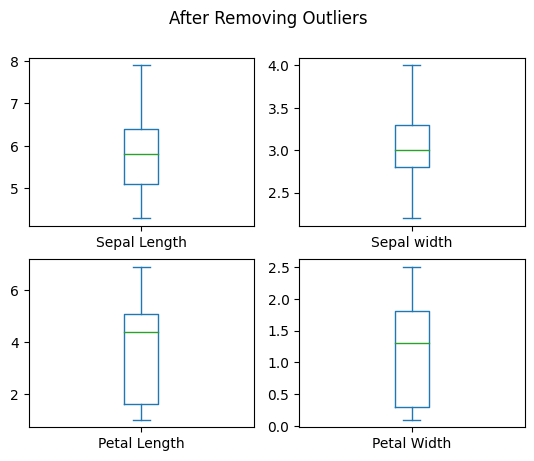

In [127]:
data.plot(kind = 'box',subplots = True, layout = (2,2), title = 'After Removing Outliers')

## Checking Skewness

C:\Users\Hunain\AppData\Local\Temp\ipykernel_12196\2321211178.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Petal Length'],)
C:\Users\Hunain\AppData\Local\Temp\ipykernel_12196\2321211178.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Petal Width"])
C:\Users\Hunain\AppData

<Axes: title={'center': 'Sepal Width Distribution'}, xlabel='Sepal width', ylabel='Density'>

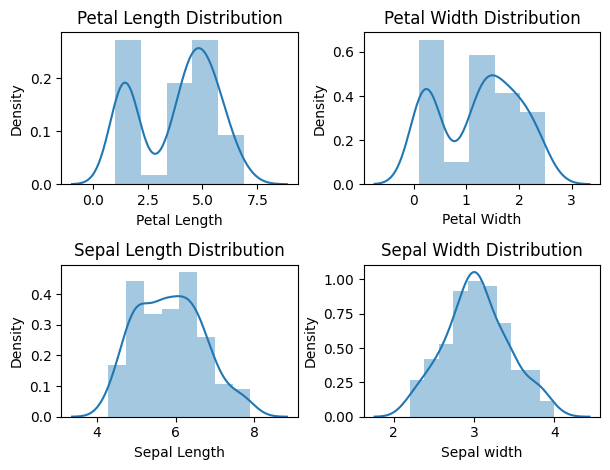

In [128]:
plt.subplot(2,2,1)
plt.tight_layout() 
# The first parameter, 2, specifies the number of rows in the subplot grid.
# The second parameter, 2, specifies the number of columns in the subplot grid.
# The third parameter, 1, specifies the position of the current subplot within the grid.
plt.title("Petal Length Distribution")
sns.distplot(data['Petal Length'],)

plt.subplot(2,2,2) 
plt.tight_layout() 
plt.title("Petal Width Distribution")
sns.distplot(data["Petal Width"])

plt.subplot(2,2,3) 
plt.tight_layout() 
plt.title("Sepal Length Distribution")
sns.distplot(data["Sepal Length"])

plt.subplot(2,2,4) 
plt.tight_layout() 
plt.title("Sepal Width Distribution")
sns.distplot(data["Sepal width"])


## Label Encoding

Names Should be converted to labels as it can be recognizable.

In [129]:
enc = LabelEncoder()
data['Names'] = enc.fit_transform(data['Names'])
data.head()

,Sepal Length,Sepal width,Petal Length,Petal Width,Names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


array([[<Axes: title={'center': 'Sepal Length'}>,
        <Axes: title={'center': 'Sepal width'}>],
       [<Axes: title={'center': 'Petal Length'}>,
        <Axes: title={'center': 'Petal Width'}>],
       [<Axes: title={'center': 'Names'}>, <Axes: >]], dtype=object)

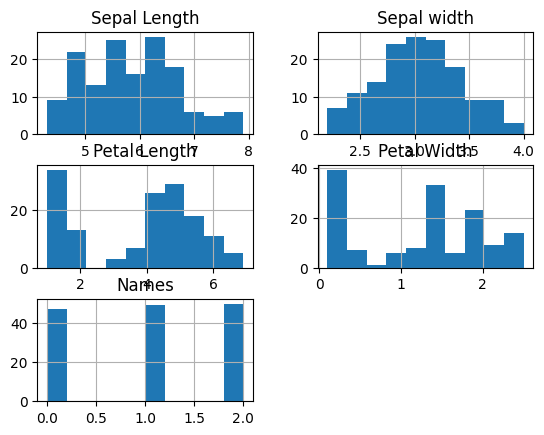

In [130]:
data.hist()

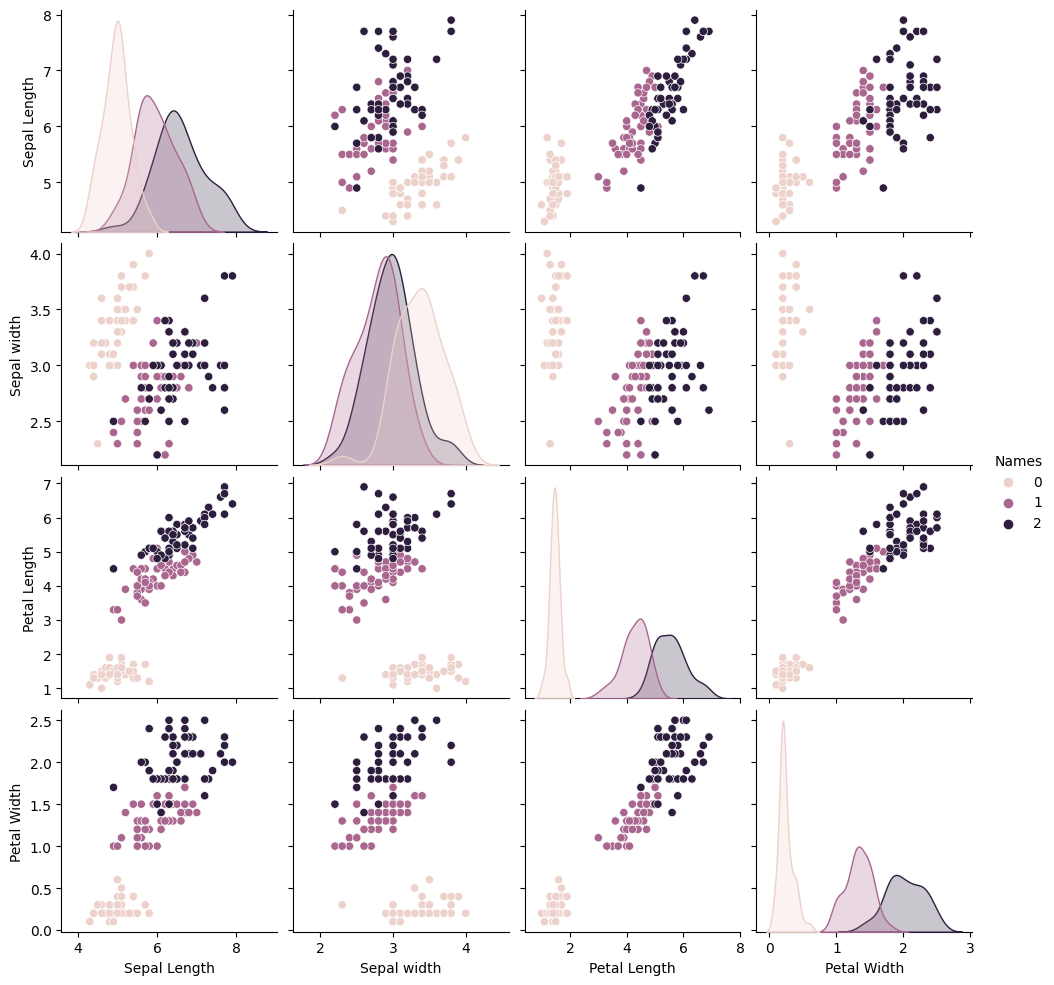

In [131]:
sns.pairplot(data,hue='Names')

<Axes: ylabel='count'>

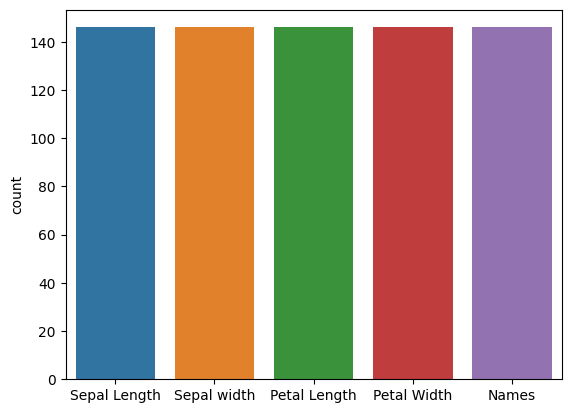

In [132]:
sns.countplot(data=data)

## Correlation

In [133]:
data1 = data.drop('Names',axis=1) # Removing Names Because Correlation will not work with String
data1.corr()

,Sepal Length,Sepal width,Petal Length,Petal Width
Sepal Length,1.000000,-0.113977,0.879374,0.822577
Sepal width,-0.113977,1.000000,-0.397123,-0.329782
Petal Length,0.879374,-0.397123,1.000000,0.961755
Petal Width,0.822577,-0.329782,0.961755,1.000000


<Axes: >

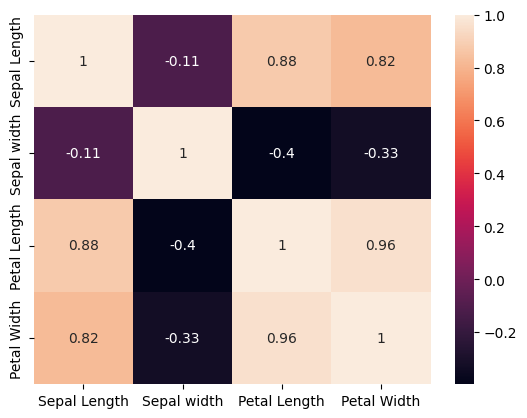

In [134]:
sns.heatmap(data1.corr(),annot=True)

## Training Set and Testing Set Selection

In [135]:
x = data.drop(columns=['Names'])
y = data['Names']

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [137]:
Lg = LogisticRegression()
Lg.fit(x_train,y_train)

LogisticRegression()

In [138]:
accuracy = Lg.score(x_test,y_test)*100
print("accuracy : ",accuracy)

accuracy :  97.72727272727273


In [139]:
y_pred = Lg.predict(x_test)

## Accuracy 

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



## New Values Prediction

In [141]:
inp = np.array([[2.5,3.8,4.3,3.3],[3.5,2.8,4,3],[3.2,3.8,3.1,2.6]])
new_check = Lg.predict(inp)
print(new_check)



[2 2 0]


C:\Users\Hunain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision Tree Classifier (Accuracy) 

In [142]:
model = DecisionTreeClassifier()

In [143]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [144]:
print(model.score(x_test,y_test)*100,"%")

97.72727272727273 %


## Support Vector Classifier (Accuracy)

In [145]:
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [146]:
print(model.score(x_test,y_test)*100,"%")

97.72727272727273 %
